# Question 1

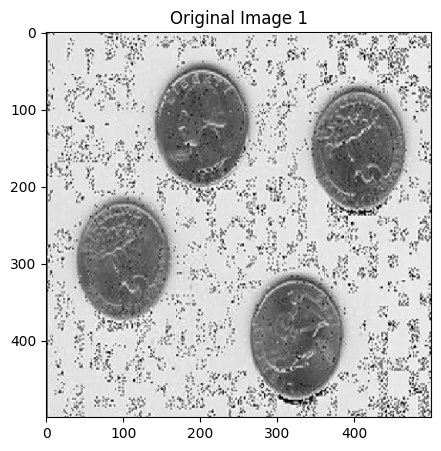

In [1]:
#First we start by loading the original first image

import cv2
from matplotlib import pyplot as plt

img1 = cv2.imread("../Data/image1.jpg")

plt.figure(figsize=(img1.shape[0]/100, img1.shape[1]/100))
plt.imshow(img1)
plt.title("Original Image 1")
plt.savefig("../Plots/Original Image 1.png")
plt.show()

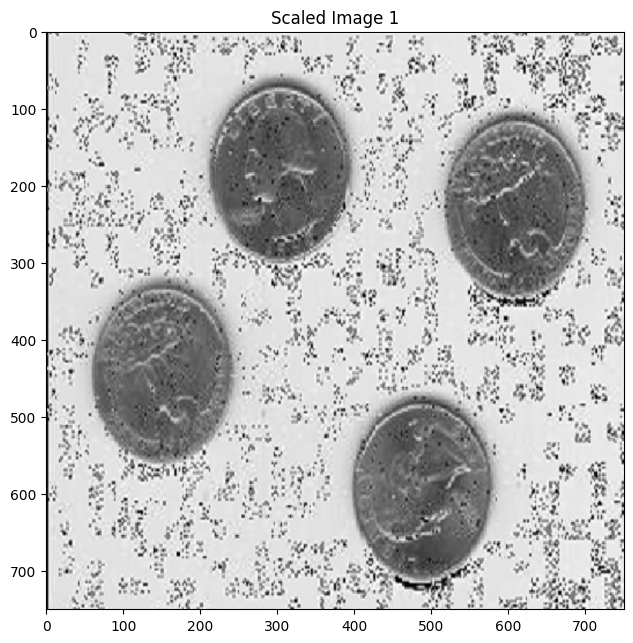

In [2]:
#Now we perform a 1.5 * 1.5 scaling on it, using the resize function in cv2 library

scaled_img1 = cv2.resize(img1, None, fx=1.5, fy=1.5, interpolation=cv2.INTER_LINEAR)

plt.figure(figsize=(scaled_img1.shape[0]/100, scaled_img1.shape[1]/100))
plt.imshow(scaled_img1)
plt.title("Scaled Image 1")
plt.savefig("../Plots/Scaled Image 1.png")
plt.show()

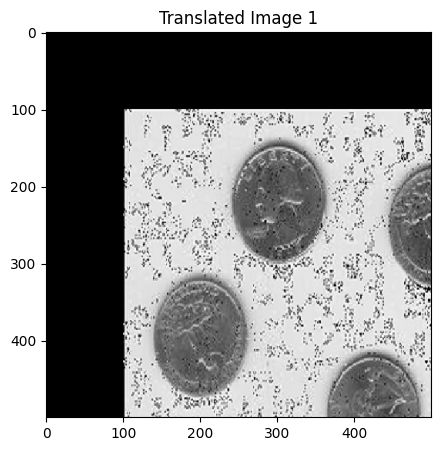

In [3]:
#Now we try to translate original image with translation matrix of M

import numpy as np

M = np.float32([[1, 0, 100], [0, 1, 100]])

translated_img1 = cv2.warpAffine(img1, M, (img1.shape[1], img1.shape[0]))

plt.figure(figsize=(translated_img1.shape[0]/100, translated_img1.shape[1]/100))
plt.imshow(translated_img1)
plt.title("Translated Image 1")
plt.savefig("../Plots/Translated Image 1.png")
plt.show()

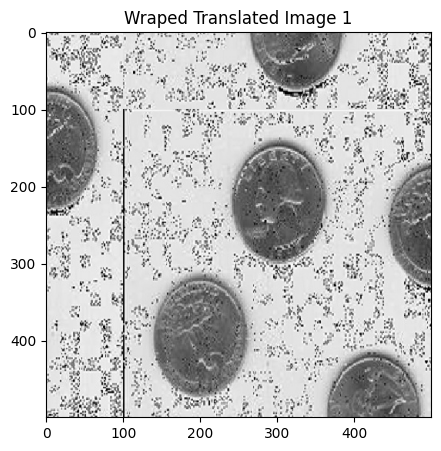

In [5]:
#Now we try to translate original image with translation matrix of M and also we wrap lost data back to our image

import numpy as np

M = np.float32([[1, 0, 100], [0, 1, 100]])

wraped_translated_img1 = cv2.warpAffine(img1, M, (img1.shape[1], img1.shape[0]))
height, width = img1.shape[:2]
wraped_translated_img1[:100, :] = img1[height-100:, :]
wraped_translated_img1[:, :100] = img1[:, width-100:]

plt.figure(figsize=(wraped_translated_img1.shape[0]/100, wraped_translated_img1.shape[1]/100))
plt.imshow(wraped_translated_img1)
plt.title("Wraped Translated Image 1")
plt.savefig("../Plots/Wraped Translated Image 1.png")
plt.show()

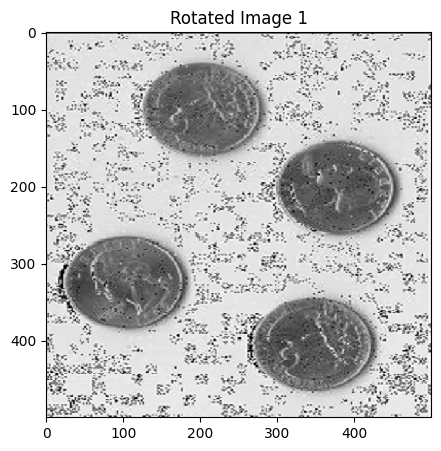

In [6]:
#Now we try to perform a 90 degrees rotation on our original image

rotated_img1 = cv2.rotate(img1, cv2.ROTATE_90_CLOCKWISE)

plt.figure(figsize=(rotated_img1.shape[0]/100, rotated_img1.shape[1]/100))
plt.imshow(rotated_img1)
plt.title("Rotated Image 1")
plt.savefig("../Plots/Rotated Image 1.png")
plt.show()

# Question 2

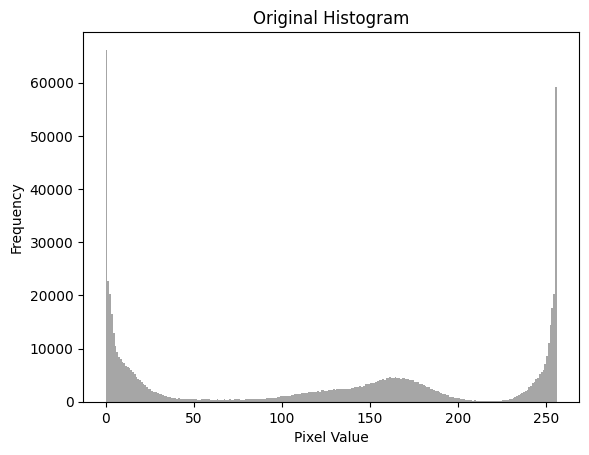

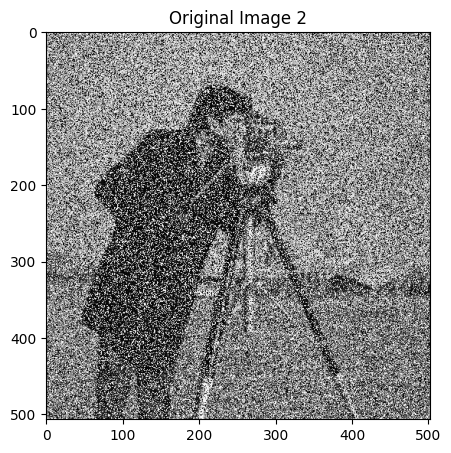

In [8]:
#First we plot the original image and its histogram
img2 = cv2.imread("../Data/image2.jpg")

plt.hist(img2.flatten(), bins=256, range=(0, 256), color='gray', alpha=0.7)
plt.title('Original Histogram')
plt.xlabel('Pixel Value')
plt.ylabel('Frequency')
plt.savefig("../Plots/Original Histogram Image 2.png")
plt.show()

plt.figure(figsize=(img2.shape[0]/100, img2.shape[1]/100))
plt.imshow(img2, cmap='gray')
plt.title("Original Image 2")
plt.savefig("../Plots/Original Image 2.png")
plt.show()

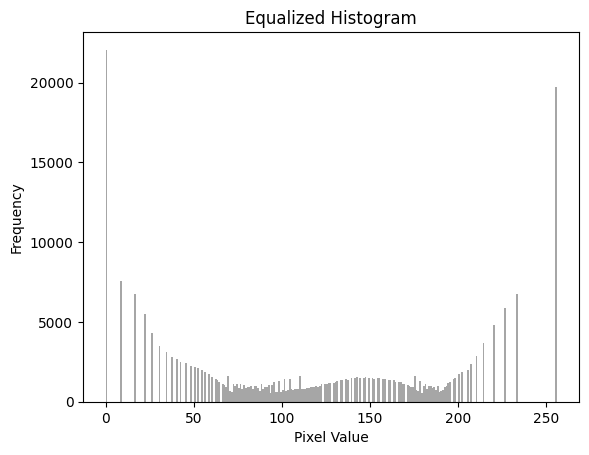

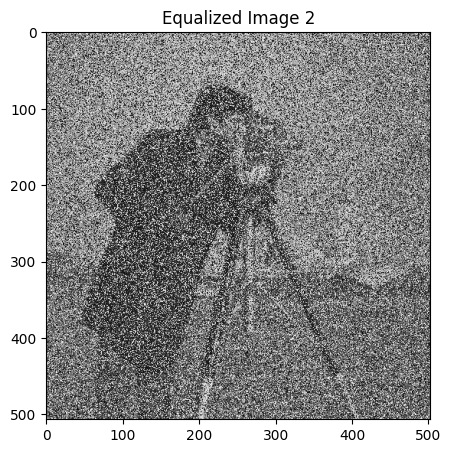

In [10]:
#Now we perform a histogram equalization on the the image and plot its histogram
#and itself

gray_img2 = cv2.cvtColor(img2, cv2.COLOR_BGR2GRAY)
equalized_img2 = cv2.equalizeHist(gray_img2)

plt.hist(equalized_img2.flatten(), bins=256, range=(0, 256), color='gray', alpha=0.7)
plt.title('Equalized Histogram')
plt.xlabel('Pixel Value')
plt.ylabel('Frequency')
plt.savefig("../Plots/Equalized Histogram Image 2.png")
plt.show()

plt.figure(figsize=(equalized_img2.shape[0]/100, equalized_img2.shape[1]/100))
plt.imshow(equalized_img2, cmap='gray')
plt.title("Equalized Image 2")
plt.savefig("../Plots/Equalized Image 2.png")
plt.show()

# Question 3

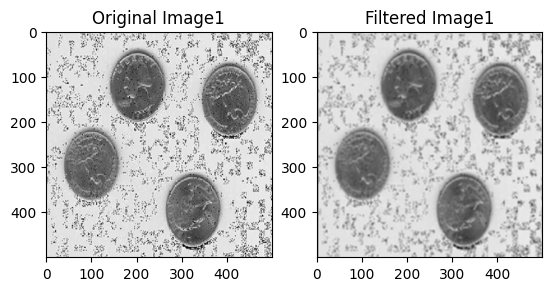

In [11]:
#First we apply the Average filter on the first image

img1 = cv2.imread("../Data/image1.jpg")

kernel = np.ones((5, 5), np.float32) / (25)
filtered_img1 = cv2.filter2D(img1, -1, kernel)

fig, ax = plt.subplots(1,2)

ax[0].imshow(img1)
ax[0].set_title('Original Image1')
ax[1].imshow(filtered_img1)
ax[1].set_title('Filtered Image1')

plt.savefig("../Plots/Filtered and Original Image 1.png")
plt.show()

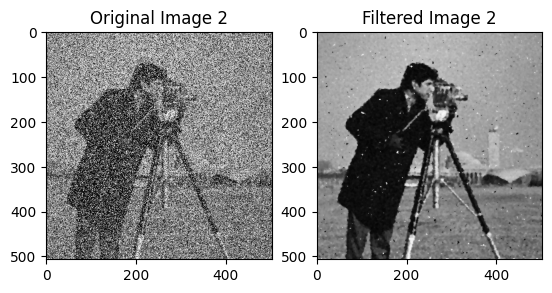

In [16]:
#Second we apply the Median filter on the second image
img2 = cv2.imread("../Data/image2.jpg")

filtered_img2 = cv2.medianBlur(img2, 5)

fig, ax = plt.subplots(1,2)
ax[0].imshow(img2)
ax[0].set_title('Original Image 2')

ax[1].imshow(filtered_img2)
ax[1].set_title('Filtered Image 2')

plt.savefig("../Plots/Filtered and Original Image 2.png")
plt.show()

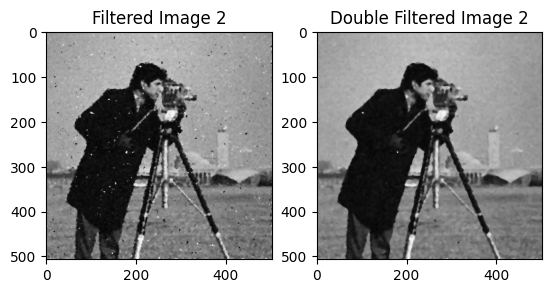

In [17]:
#Now we apply the Median filter on the filtered image again to remove the remaining noises
img2 = cv2.imread("../Data/image2.jpg")

filtered_img2_2 = cv2.medianBlur(filtered_img2, 5)

fig, ax = plt.subplots(1,2)
ax[0].imshow(filtered_img2)
ax[0].set_title('Filtered Image 2')

ax[1].imshow(filtered_img2_2)
ax[1].set_title('Double Filtered Image 2')

plt.savefig("../Plots/Double Filtered and Filtered Image 2.png")
plt.show()

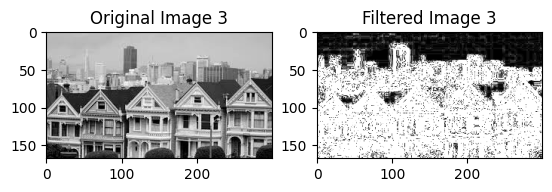

In [13]:
#Third we apply the Laplacian filter on the third image

img3 = cv2.imread("../Data/image3.jpg")

img3 = cv2.cvtColor(img3, cv2.COLOR_BGR2GRAY)
filtered_img3 = cv2.Laplacian(img3, cv2.CV_16S, ksize=5)
filtered_img3 = cv2.convertScaleAbs(filtered_img3)

fig, ax = plt.subplots(1,2)

ax[0].imshow(img3, cmap='gray')
ax[0].set_title('Original Image 3')
ax[1].imshow(filtered_img3, cmap='gray')
ax[1].set_title('Filtered Image 3')

plt.savefig("../Plots/Filtered and Original Image 3.png")
plt.show()

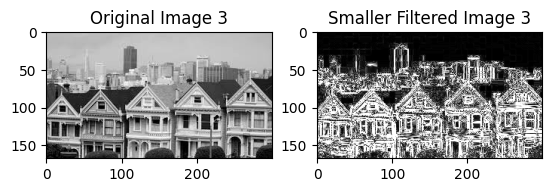

In [18]:
#Now we apply the Laplacian filter on the third image but with smaller filtering size

img3 = cv2.imread("../Data/image3.jpg")

img3 = cv2.cvtColor(img3, cv2.COLOR_BGR2GRAY)
filtered_img3 = cv2.Laplacian(img3, cv2.CV_16S, ksize=3)
filtered_img3 = cv2.convertScaleAbs(filtered_img3)

fig, ax = plt.subplots(1,2)

ax[0].imshow(img3, cmap='gray')
ax[0].set_title('Original Image 3')
ax[1].imshow(filtered_img3, cmap='gray')
ax[1].set_title('Smaller Filtered Image 3')

plt.savefig("../Plots/Smaller Filtered and Original Image 3.png")
plt.show()

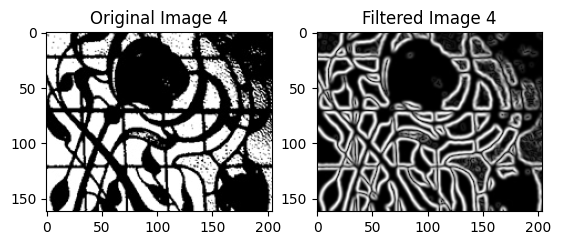

In [14]:
#Fourth we apply the Sobel filter on the fourth image

img4 = cv2.imread("../Data/image4.jpg")

img4 = cv2.cvtColor(img4, cv2.COLOR_BGR2GRAY)
sobelx_img4 = cv2.Sobel(img4, cv2.CV_64F, 1, 0, ksize=7)
sobely_img4 = cv2.Sobel(img4, cv2.CV_64F, 0, 1, ksize=7)
filtered_img4 = cv2.magnitude(sobelx_img4, sobely_img4)

fig, ax = plt.subplots(1,2)

ax[0].imshow(img4, cmap='gray')
ax[0].set_title('Original Image 4')
ax[1].imshow(filtered_img4, cmap='gray')
ax[1].set_title('Filtered Image 4')

plt.savefig("../Plots/Filtered and Original Image 4.png")
plt.show()